# Importación de librerías

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [2]:
# Datos en bruto
data = datasets.load_wine()

In [3]:
#Verificamos la info del dataset
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print('Las características del dataset son: ')
print(data.DESCR)

Las características del dataset son: 
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:     

## Creamos el dataset

In [5]:
print('El contenido del dataset es: ')
data

El contenido del dataset es: 


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
df_wine = pd.DataFrame(data=data.data, columns=data.feature_names)
df_wine['target'] = data.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
# Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(df_wine.shape)

Cantidad de datos:
(178, 14)


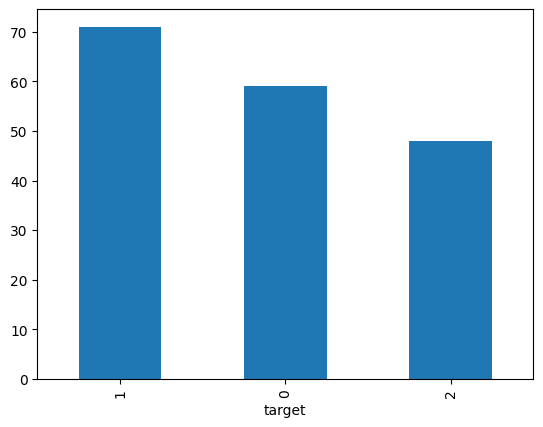

In [8]:
# Verifico el número de registros por clase
freq = df_wine['target'].value_counts()
freq.plot(kind='bar')
plt.show()

## Exploramos los datos

In [9]:
#Creamos una lista con los nombres de las columnas
nombrescolumnas = data.feature_names
nombrescolumnas.append('target')

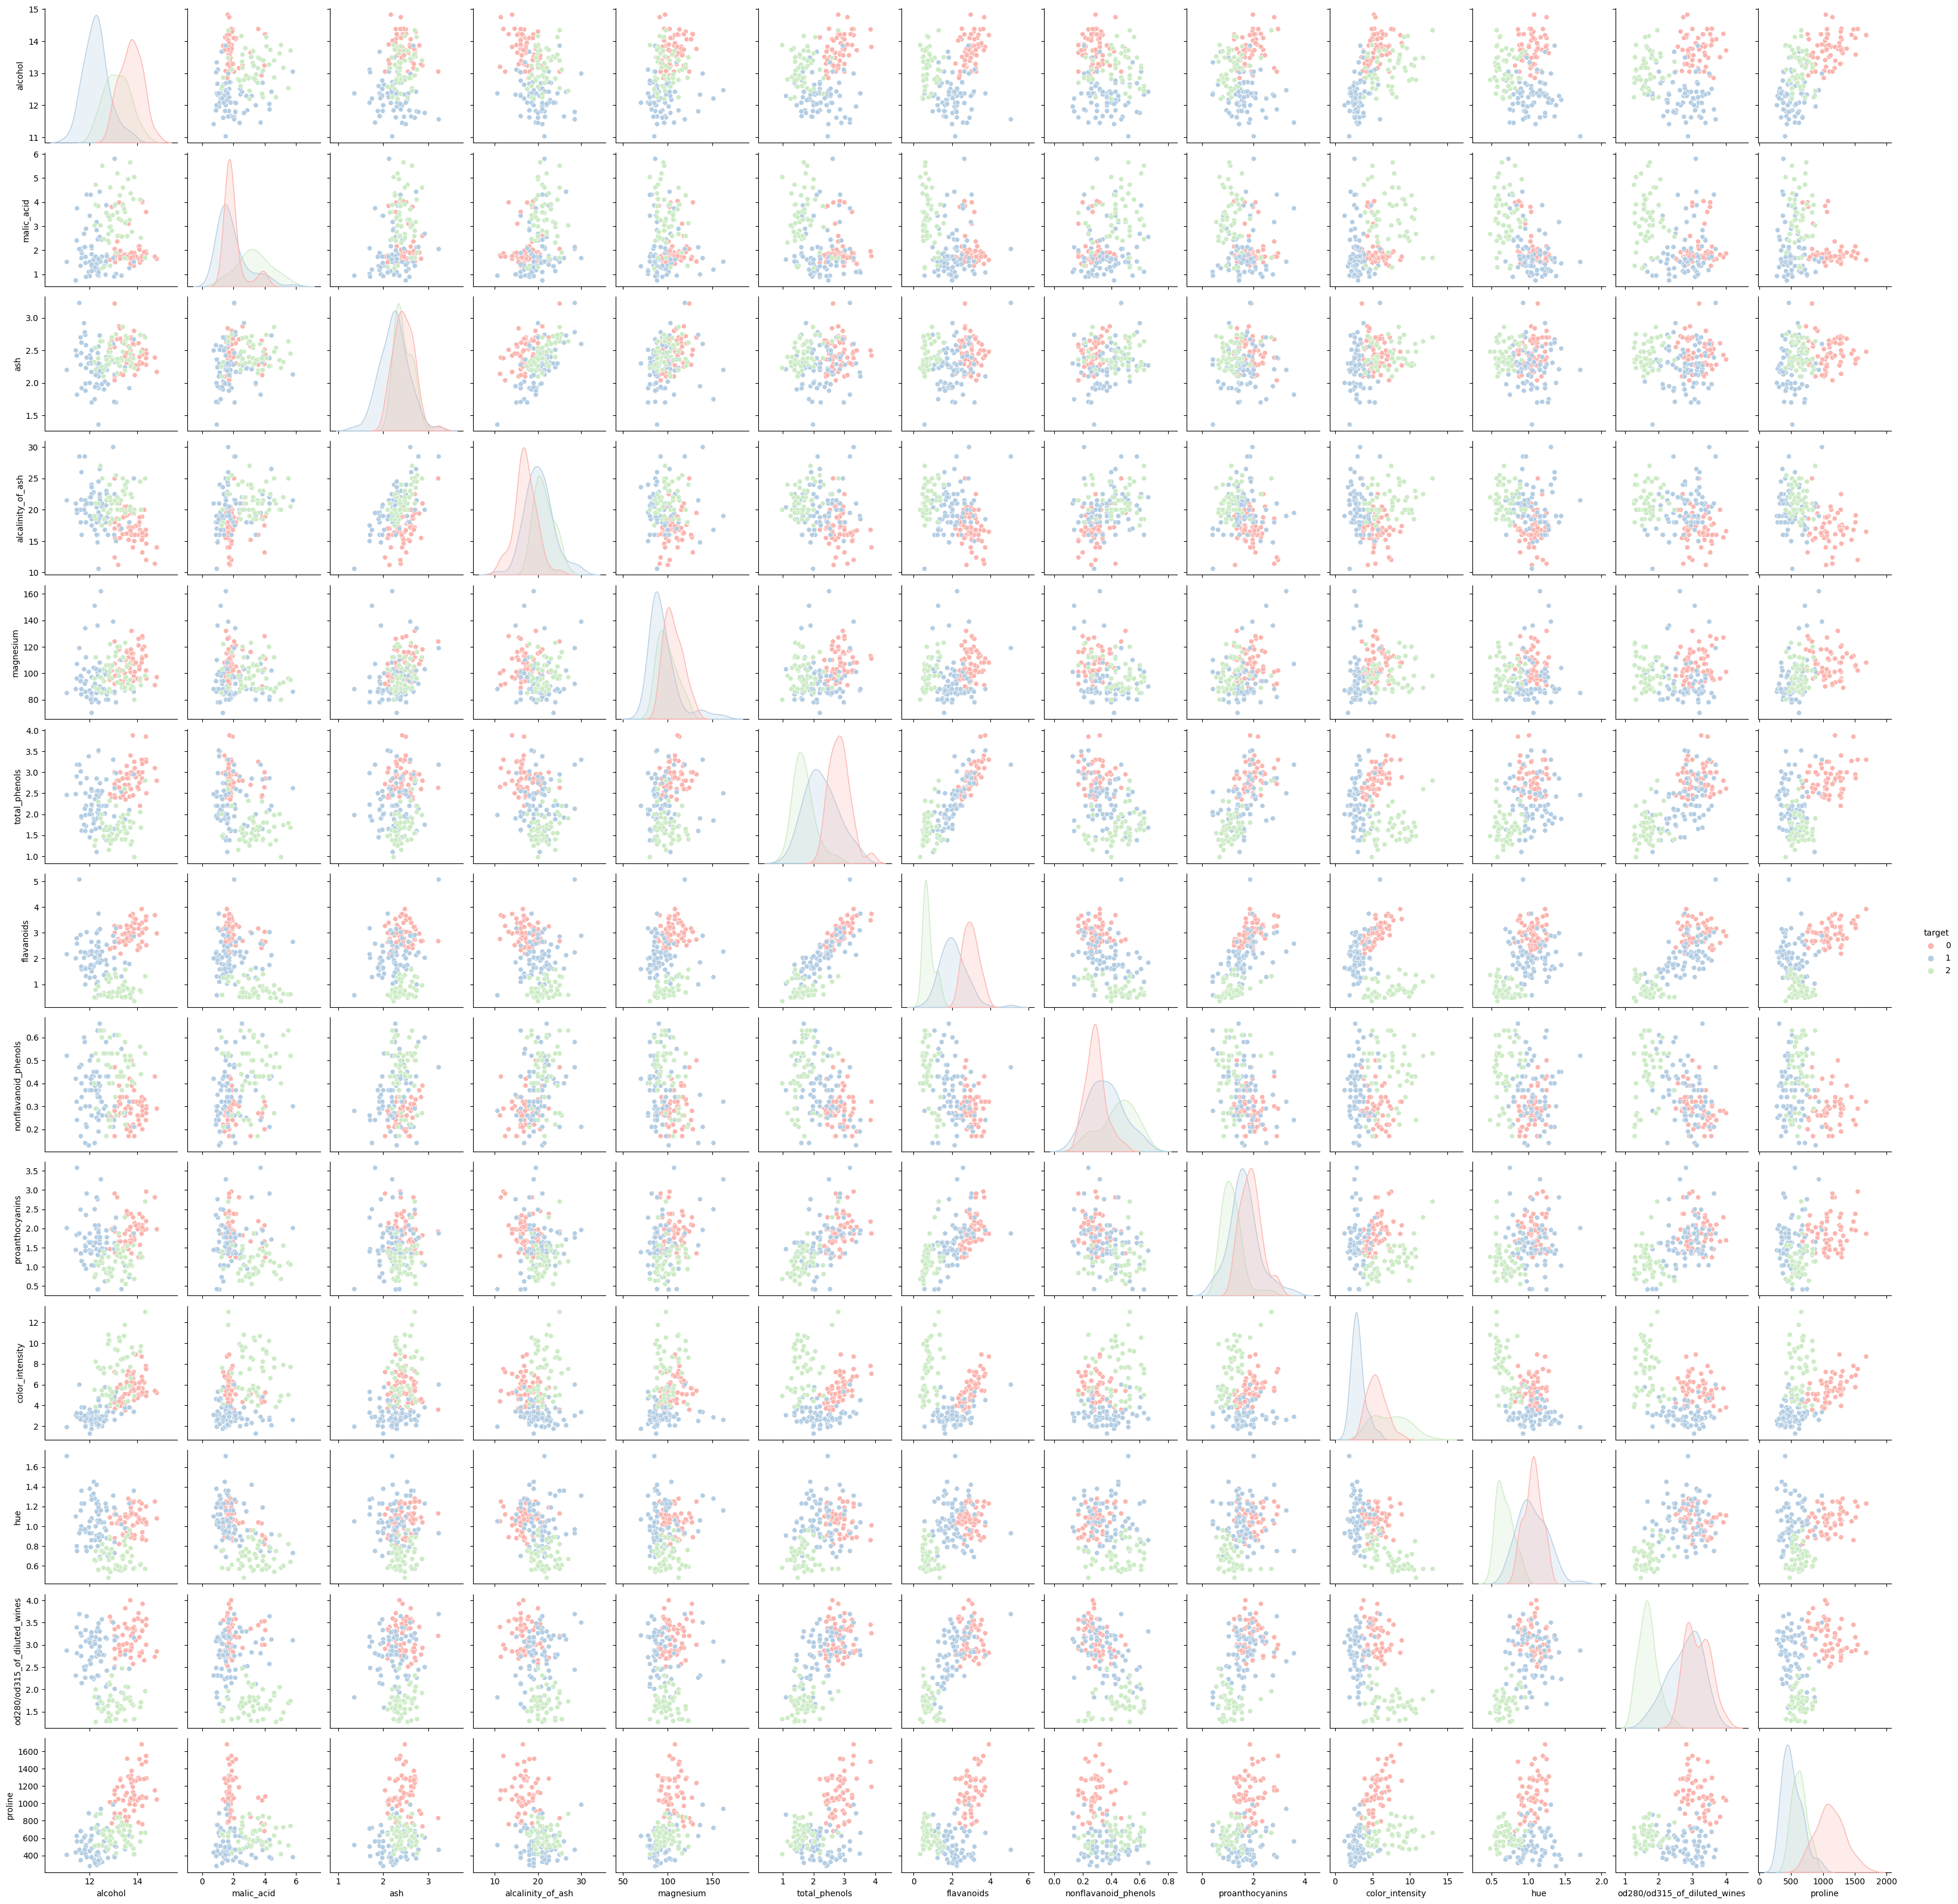

In [10]:
# A través de un pairplot analizamos los datos
df = df_wine[nombrescolumnas]
sns.pairplot(df_wine, hue='target', palette='Pastel1')
plt.show()

## Selección de datos
No hay ninguna variable que convenza demasiado, puesto que casi todas se solapan demasiado.
Escogeremos flavanoids

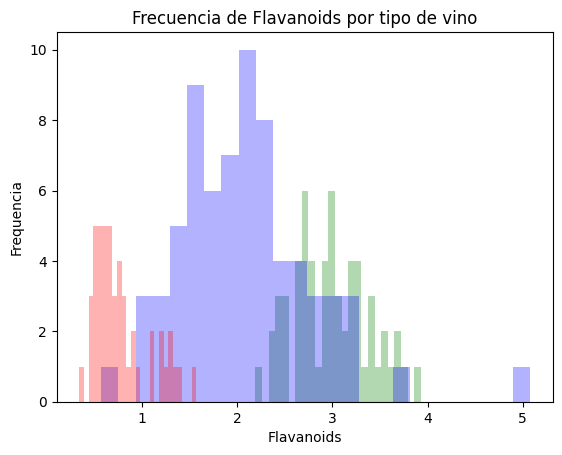

In [11]:
# Histograma de la variable alcohol
x1 = df_wine.loc[df_wine.target==0, 'flavanoids']
x2 = df_wine.loc[df_wine.target==1, 'flavanoids']
x3 = df_wine.loc[df_wine.target==2, 'flavanoids']

# Argumentos para los colores
kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0')
plt.hist(x2, **kwargs, color='b', label='Tipo 1')
plt.hist(x3, **kwargs, color='r', label='Tipo 2')
plt.gca().set(title='Frecuencia de Flavanoids por tipo de vino', xlabel='Flavanoids', ylabel='Frequencia')
plt.show()


## Preprocesamiento de datos

In [12]:
X = df_wine[['flavanoids']]
y = df_wine['target']

In [13]:
y = df_wine['target']

In [14]:
# Dividimos los datos de "entrenamiento" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Creación del modelo de clasificación

In [15]:
# Selección número de vecionos
k = 3
# Creación del modelo
knn_model = KNeighborsClassifier(n_neighbors=k)
#Ajustar el modelo al cojunto de datos
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicción del conjunto de datos

In [16]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0])

## Validación de resultados

In [17]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
54,0,0
151,2,1
63,1,0
55,0,0
123,1,1


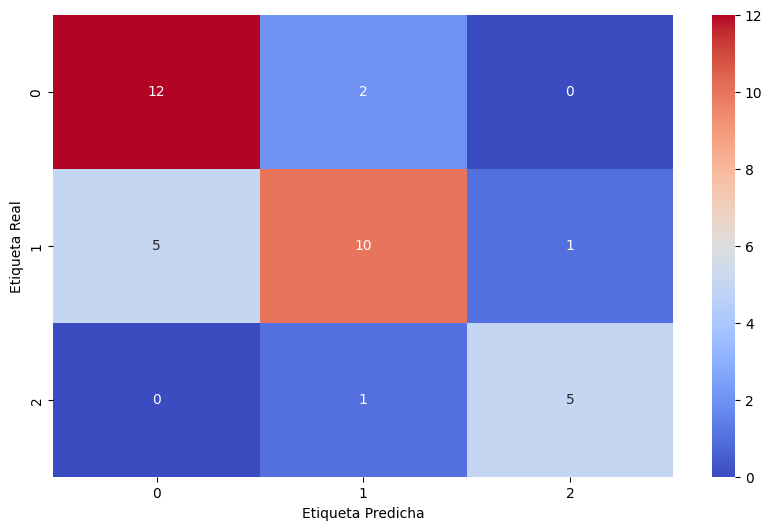

In [18]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', ax=ax)
shm.set_xlabel('Etiqueta Predicha')
shm.set_ylabel('Etiqueta Real')
plt.show()

## Métricas
- Precisión: Permite medir la calidad del modelo. Indica cuántos de los registros predichos como una clase pertenecen a esa clase.  
- Recall: Permite medir la cantidad de registros que el modelo es capaz de identificar.  
- F1-score: Combina las medidas de precisión y recall.
- Macro avg: Calcula la media de los valores de cada clase.
- Weighted avg: Calcula la media de los valores de cada clase teniendo en cuenta el número de registros de cada clase (support)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.77      0.62      0.69        16
           2       0.83      0.83      0.83         6

    accuracy                           0.75        36
   macro avg       0.77      0.77      0.77        36
weighted avg       0.76      0.75      0.75        36



Este modelo podría mejorarse bastante puesto que, cuándo la variedad de vino es 1, solo acierta el 62% de las veces  
Esto baja la precisión de 0, puesto que cuando el modelo predice que es 0, aproximadamente un 30% de las veces va a ser de la variedad 1  
Vamos a intentar mejorar el modelo introduciendo la intensidad del color 

## Mejora del modelo
Vamos a intentar mejorar la calidad de nuestro modelo.
Escogeremos, además de flavanoids, color_intensity, ya que muchos de los vinos tienen un color característico (tintos, rojos, rosados)

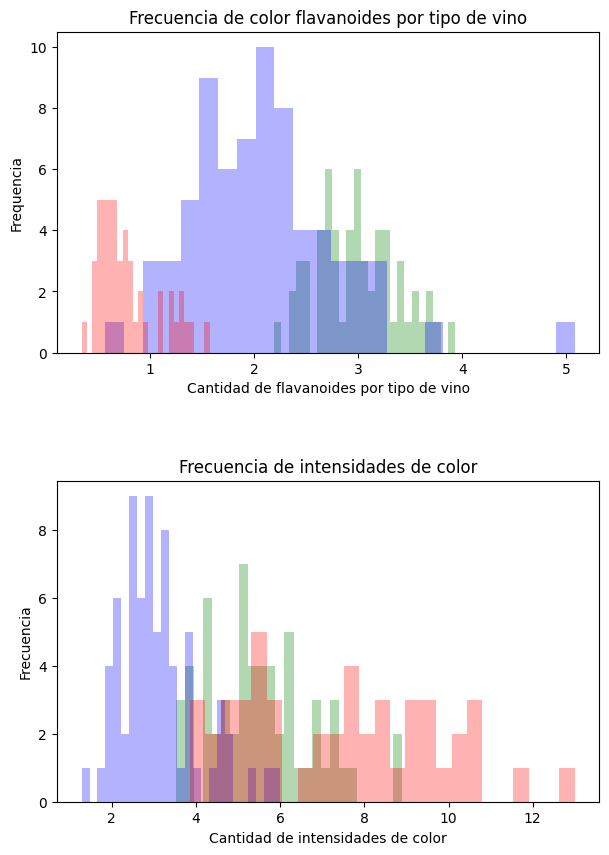

In [22]:
x11 = df_wine.loc[df_wine.target==0, 'flavanoids']
x21 = df_wine.loc[df_wine.target==1, 'flavanoids']
x31 = df_wine.loc[df_wine.target==2, 'flavanoids']
x12 = df_wine.loc[df_wine.target==0, 'color_intensity']
x22 = df_wine.loc[df_wine.target==1, 'color_intensity']
x32 = df_wine.loc[df_wine.target==2, 'color_intensity']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7,10))
fig.subplots_adjust(hspace=0.4)
axes[0].hist(x11, **kwargs, color='g', label='Tipo 0')
axes[0].hist(x21, **kwargs, color='b', label='Tipo 1')
axes[0].hist(x31, **kwargs, color='r', label='Tipo 2')
axes[0].set_title('Frecuencia de color flavanoides por tipo de vino')
axes[0].set_xlabel('Cantidad de flavanoides por tipo de vino')
axes[0].set_ylabel('Frequencia')
axes[1].hist(x12, **kwargs, color='g', label='Tipo 0')
axes[1].hist(x22, **kwargs, color='b', label='Tipo 1')
axes[1].hist(x32, **kwargs, color='r', label='Tipo 2')
axes[1].set_title('Frecuencia de intensidades de color')
axes[1].set_xlabel('Cantidad de intensidades de color')
axes[1].set_ylabel('Frecuencia')
plt.show()

## Preprocesamiento de datos

In [23]:
X = df_wine[['color_intensity','flavanoids']]
y = df_wine['target']

In [24]:
y = df_wine['target']

In [25]:
# Dividimos los datos de "entrenamiento" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Creación del modelo de clasificación

In [26]:
# Selección número de vecionos
k = 3
# Creación del modelo
knn_model = KNeighborsClassifier(n_neighbors=k)
#Ajustar el modelo al cojunto de datos
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicción del conjunto de datos

In [27]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0])

## Validación de resultados

In [28]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
54,0,0
151,2,2
63,1,0
55,0,0
123,1,1


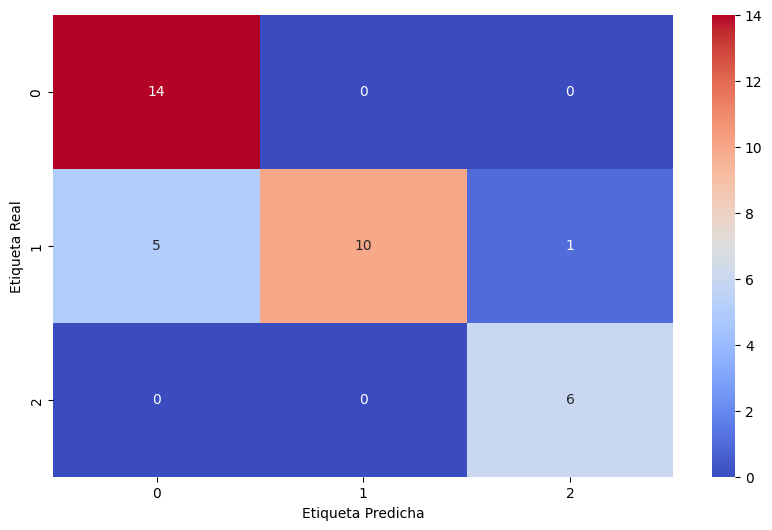

In [29]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', ax=ax)
shm.set_xlabel('Etiqueta Predicha')
shm.set_ylabel('Etiqueta Real')
plt.show()

## Métricas
- Como podemos observar, la calidad del modelo ha mejorado mucho.

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.62      0.77        16
           2       0.86      1.00      0.92         6

    accuracy                           0.83        36
   macro avg       0.86      0.88      0.85        36
weighted avg       0.87      0.83      0.83        36



En este modelo hemos mejorado bastante, ya que siempre que el modelo prediga que la variedad de vino es 1, siempre va a ser variedad de vino 1 
Cuando las variedades realesde los vinos sean 0 o 2, el modelo siempre va a predecir la variedad correcta a la que pertenece
El recall no ha mejorado pues en un 38% de los casos va a decir falsamente que la variedad de vino es 0 o 2, cuando en realidad se trata realmenta de la variedad 1.  